In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from collections import Counter
from scipy.stats import chi2_contingency, pearsonr
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway

In [3]:
# Read parquet file
df = pd.read_parquet('../allocine_spider(3).parquet')
df.head()

,actors,critics_score,date,director,editor,french_boxoffice,french_first_week_boxoffice,french_visa,genre,langage,length,nationality,title,url,viewers_score,vo_title
0,George Clooney|Julia Roberts|Jack O'Connell,3.5,2016-05-12,Jodie Foster,Sony Pictures Releasing France,847743,305385.0,144018,Thriller,Anglais,99,U.S.A.,Money Monster,/video/player_gen_cmedia=19561526&cfilm=214139...,3.6,None
1,Kad Merad|Géraldine Pailhas|Lola Creton,2.7,2015-01-21,Christophe Lamotte,Rezo Films,44310,29265.0,117439,Drame|Thriller,Français,100,France,Disparue en hiver,/article/fichearticle_gen_carticle=18639324.html,2.3,None
2,Nicolas Cage|Kev Adams|Ryan Reynolds,3.8,2013-04-10,Chris Sanders,Twentieth Century Fox France,2350349,501465.0,135882,Aventure|Animation|Comédie|Famille,Anglais,98,U.S.A.,Les Croods,/video/player_gen_cmedia=19410286&cfilm=146916...,3.9,The Croods
3,Dylan O'Brien|Michael Keaton|Taylor Kitsch,2.3,2017-09-20,Michael Cuesta,Metropolitan FilmExport,260465,104402.0,147308,Action|Thriller,Anglais,112,U.S.A.,American Assassin,/video/player_gen_cmedia=19569927&cfilm=194970...,3.2,None
4,Virginie Efira|Anaïs Demoustier|Laurent Stocker,3.5,2015-04-22,Emmanuel Mouret,Pyramide Distribution,125641,64046.0,138835,Comédie|Romance,Français,100,France,Caprice,/diaporamas/cinema/diaporama-18643599/,2.7,None


In [4]:
df.info

<bound method DataFrame.info of                                                  actors critics_score  \
0           George Clooney|Julia Roberts|Jack O'Connell           3.5   
1               Kad Merad|Géraldine Pailhas|Lola Creton           2.7   
2                  Nicolas Cage|Kev Adams|Ryan Reynolds           3.8   
3            Dylan O'Brien|Michael Keaton|Taylor Kitsch           2.3   
4       Virginie Efira|Anaïs Demoustier|Laurent Stocker           3.5   
...                                                 ...           ...   
7422  Charlotte Gainsbourg|Stellan Skarsgård|Stacy M...           3.2   
7423    Zabou Breitman|Adèle Exarchopoulos|Tchéky Karyo           2.3   
7424   Jennifer Lawrence|Josh Hutcherson|Liam Hemsworth           3.4   
7425         Leonardo DiCaprio|Jonah Hill|Margot Robbie           4.0   
7426       Joaquin Phoenix|Scarlett Johansson|Amy Adams           3.9   

            date            director                          editor  \
0     2016-05-12   

In [5]:
df.describe()

,french_boxoffice,french_first_week_boxoffice
count,7.427000e+03,7.424000e+03
mean,3.302840e+05,1.636247e+05
std,8.342673e+05,8.189510e+05
min,0.000000e+00,5.000000e+00
25%,6.926500e+03,3.978000e+03
50%,5.428500e+04,2.435600e+04
75%,2.629160e+05,1.173440e+05
max,1.927542e+07,2.375150e+07


In [6]:
df.dtypes

actors                          object
critics_score                   object
date                            object
director                        object
editor                          object
french_boxoffice                 int64
french_first_week_boxoffice    float64
french_visa                     object
genre                           object
langage                         object
length                          object
nationality                     object
title                           object
url                             object
viewers_score                   object
vo_title                        object
dtype: object

In [7]:
df.isna().sum()

actors                          151
critics_score                     0
date                              0
director                         15
editor                            0
french_boxoffice                  0
french_first_week_boxoffice       3
french_visa                       0
genre                             0
langage                           0
length                            0
nationality                       6
title                             0
url                               0
viewers_score                     0
vo_title                       4772
dtype: int64

In [8]:
df["actors"].fillna('No actors', inplace=True)

/tmp/ipykernel_29373/3692202257.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["actors"].fillna('No actors', inplace=True)


In [9]:
df["vo_title"].fillna(df['title'], inplace=True)

/tmp/ipykernel_29373/593610535.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["vo_title"].fillna(df['title'], inplace=True)


In [10]:
df.isna().sum()

actors                          0
critics_score                   0
date                            0
director                       15
editor                          0
french_boxoffice                0
french_first_week_boxoffice     3
french_visa                     0
genre                           0
langage                         0
length                          0
nationality                     6
title                           0
url                             0
viewers_score                   0
vo_title                        0
dtype: int64

In [11]:
df['french_visa'].value_counts(ascending=True)

french_visa
151222      1
132827      1
147704      1
138133      1
143702      1
         ... 
156238      1
155738      1
159338      1
147589      2
-         678
Name: count, Length: 6749, dtype: int64

In [12]:
df[df['french_visa']=='-']

,actors,critics_score,date,director,editor,french_boxoffice,french_first_week_boxoffice,french_visa,genre,langage,length,nationality,title,url,viewers_score,vo_title
17,Tamannaah Bhatia| Vikram,3.2,TBR,Vijay Chandar,-,675,539.0,-,Action|Thriller,Télougou,Date de sortie inconnue,Inde,Sketch,/personne/fichepersonne_gen_cpersonne=669889.html,--,Sketch
46,Zita Hanrot|Sami Bouajila|Céline Sallette,3.7,2021-08-11,Farid Bentoumi,Ad Vitam,77766,35011.0,-,Thriller,Français,86,France|Belgique,Rouge,/article/fichearticle_gen_carticle=18707612.html,3.5,Rouge
56,Félix Maritaud|Eric Bernard|Nicolas Dibla,3.6,2018-12-29,Camille Vidal-Naquet,-,47427,20349.0,-,Drame,Français,99,France,Sauvage,/article/fichearticle_gen_carticle=18691636.html,3.6,Sauvage
101,Quim Gutiérrez|Martina García|Clara Lago,3.0,2012-07-04,Andrés Baiz,Haut et Court,18549,13450.0,-,Drame|Thriller,Espagnol,96,Espagne|Colombie,Inside,/personne/fichepersonne_gen_cpersonne=169765.html,3.8,La cara oculta
129,Fridtjov Såheim|Charlotte Frogner|Bjarte Tjøst...,3.2,TBR,Lise Osvoll,-,21742,8021.0,-,Aventure|Animation|Famille,Norvégien,Date de sortie inconnue,Norvège,La Colline aux gâteaux,/film/fichefilm_gen_cfilm=231099.html,--,KuToppen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7227,Jean Reno|Caterina Murino|Alban Lenoir,2.3,2015-08-19,Benjamin Rocher,SND,388456,193422.0,-,Action|Policier,Français,93,France|Grande-Bretagne,Antigang,/article/fichearticle_gen_carticle=1000045229....,2.9,Antigang
7255,Ryan Reynolds|Ben Kingsley|Natalie Martinez,2.7,2015-07-29,Tarsem Singh,SND,452899,233121.0,-,Science Fiction|Thriller,Anglais,118,U.S.A.,Renaissances,/video/player_gen_cmedia=19551860&cfilm=221081...,3.4,Self/less
7266,Karl Glusman|Aomi Muyock|Klara Kristin,3.3,2015-07-15,Gaspar Noé,Wild Bunch Distribution,61669,16961.0,-,Drame|Erotique,Anglais|Français,140,France|Belgique,Love,/article/fichearticle_gen_carticle=1000107367....,2.9,Love
7289,Eric Elmosnino|Lucy Gordon|Laetitia Casta,3.9,2010-01-20,Joann Sfar,Universal Pictures International France,1148928,511713.0,-,Biopic|Musical,Anglais|Français|Russe,130,France,Gainsbourg (Vie héroïque),/video/player_gen_cmedia=18906559&cfilm=133757...,3.6,Gainsbourg (Vie héroïque)


In [13]:
#datetime conversion
df['date'] = pd.to_datetime(df['date'], errors = 'coerce')
df.head()

,actors,critics_score,date,director,editor,french_boxoffice,french_first_week_boxoffice,french_visa,genre,langage,length,nationality,title,url,viewers_score,vo_title
0,George Clooney|Julia Roberts|Jack O'Connell,3.5,2016-05-12,Jodie Foster,Sony Pictures Releasing France,847743,305385.0,144018,Thriller,Anglais,99,U.S.A.,Money Monster,/video/player_gen_cmedia=19561526&cfilm=214139...,3.6,Money Monster
1,Kad Merad|Géraldine Pailhas|Lola Creton,2.7,2015-01-21,Christophe Lamotte,Rezo Films,44310,29265.0,117439,Drame|Thriller,Français,100,France,Disparue en hiver,/article/fichearticle_gen_carticle=18639324.html,2.3,Disparue en hiver
2,Nicolas Cage|Kev Adams|Ryan Reynolds,3.8,2013-04-10,Chris Sanders,Twentieth Century Fox France,2350349,501465.0,135882,Aventure|Animation|Comédie|Famille,Anglais,98,U.S.A.,Les Croods,/video/player_gen_cmedia=19410286&cfilm=146916...,3.9,The Croods
3,Dylan O'Brien|Michael Keaton|Taylor Kitsch,2.3,2017-09-20,Michael Cuesta,Metropolitan FilmExport,260465,104402.0,147308,Action|Thriller,Anglais,112,U.S.A.,American Assassin,/video/player_gen_cmedia=19569927&cfilm=194970...,3.2,American Assassin
4,Virginie Efira|Anaïs Demoustier|Laurent Stocker,3.5,2015-04-22,Emmanuel Mouret,Pyramide Distribution,125641,64046.0,138835,Comédie|Romance,Français,100,France,Caprice,/diaporamas/cinema/diaporama-18643599/,2.7,Caprice


In [14]:
df['critics_score'].replace('-', None, inplace=True)

/tmp/ipykernel_29373/3555353664.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['critics_score'].replace('-', None, inplace=True)


In [15]:
df['viewers_score'].replace('-', None, inplace=True)
df['viewers_score'].replace('--', None, inplace=True)

/tmp/ipykernel_29373/684265317.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['viewers_score'].replace('-', None, inplace=True)
/tmp/ipykernel_29373/684265317.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [16]:
df['length'].value_counts()

length
90     280
95     273
100    248
105    204
93     195
      ... 
214      1
234      1
185      1
196      1
174      1
Name: count, Length: 171, dtype: int64

In [17]:
df['length'].replace('Date de sortie inconnue', None, inplace=True)

/tmp/ipykernel_29373/1184290587.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['length'].replace('Date de sortie inconnue', None, inplace=True)


In [18]:
df['critics_score']=pd.to_numeric(df['critics_score'], errors='coerce')
df['length']=pd.to_numeric(df['length'], errors='coerce')
df['viewers_score']=pd.to_numeric(df['viewers_score'], errors='coerce')

In [19]:
df.dtypes

actors                                 object
critics_score                         float64
date                           datetime64[ns]
director                               object
editor                                 object
french_boxoffice                        int64
french_first_week_boxoffice           float64
french_visa                            object
genre                                  object
langage                                object
length                                float64
nationality                            object
title                                  object
url                                    object
viewers_score                         float64
vo_title                               object
dtype: object

In [20]:
df.describe()

,critics_score,date,french_boxoffice,french_first_week_boxoffice,length,viewers_score
count,7405.000000,7425,7.427000e+03,7.424000e+03,7425.000000,6942.000000
mean,3.097070,2017-10-30 15:09:57.818181888,3.302840e+05,1.636247e+05,102.025724,3.093950
min,1.000000,2010-01-20 00:00:00,0.000000e+00,5.000000e+00,0.000000,0.900000
25%,2.800000,2014-04-09 00:00:00,6.926500e+03,3.978000e+03,90.000000,2.700000
50%,3.200000,2017-08-11 00:00:00,5.428500e+04,2.435600e+04,100.000000,3.100000
75%,3.500000,2021-10-13 00:00:00,2.629160e+05,1.173440e+05,112.000000,3.600000
max,4.900000,2025-05-28 00:00:00,1.927542e+07,2.375150e+07,279.000000,4.500000
std,0.600981,NaN,8.342673e+05,8.189510e+05,21.504454,0.637068


<Axes: xlabel='date', ylabel='french_boxoffice'>

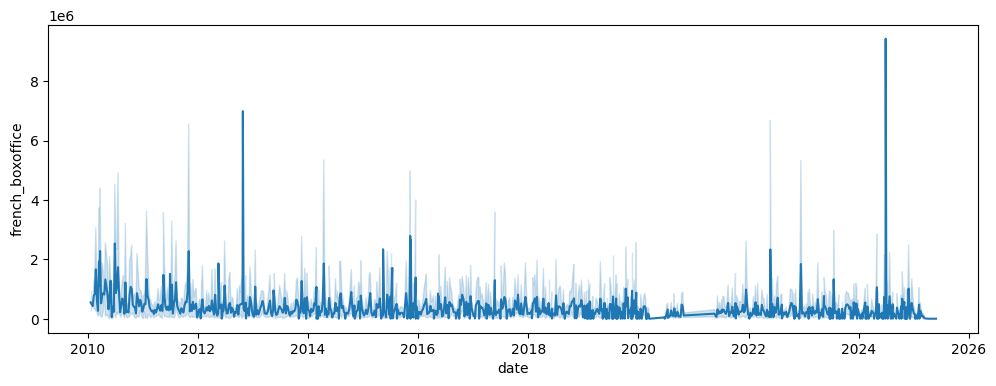

In [21]:
# Plot the box office for the the date
plt.figure(figsize=(12, 4))
sns.lineplot(x="date", y="french_boxoffice", data=df)

In [22]:
# Addition of a year columns
df['year']=df['date'].dt.year

Text(0, 0.5, 'French box office (average)')

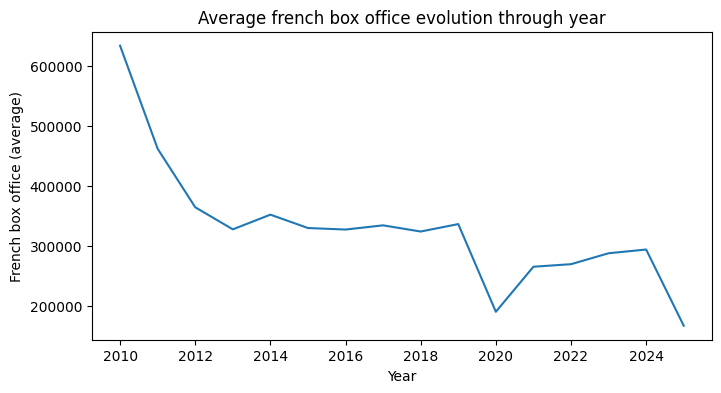

In [23]:
# Mean of boxoffice by year
mean_boxoffice_year = df['french_boxoffice'].groupby(df['year']).mean()
mean_boxoffice_year
# Plot of the mean by year
plt.figure(figsize=(8, 4))
sns.lineplot(x=mean_boxoffice_year.index, y=mean_boxoffice_year.values)
plt.title('Average french box office evolution through year')
plt.xlabel('Year')
plt.ylabel('French box office (average)')


Text(0, 0.5, 'French box office first week (average)')

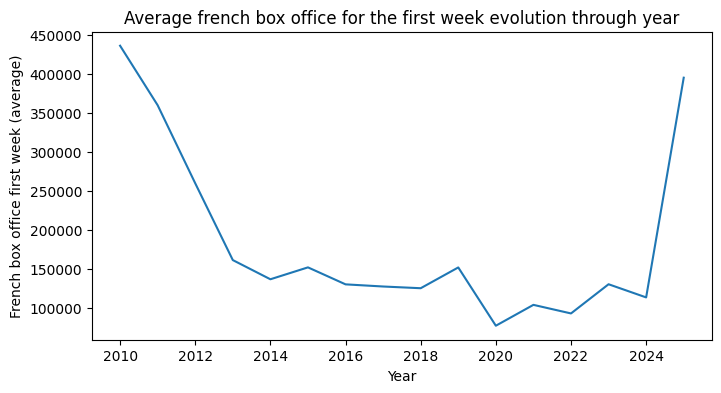

In [24]:
# Mean of boxoffice by year
mean_boxoffice_week_year = df['french_first_week_boxoffice'].groupby(df['year']).mean()
mean_boxoffice_week_year
# Plot of the mean by year
plt.figure(figsize=(8, 4))
sns.lineplot(x=mean_boxoffice_week_year.index, y=mean_boxoffice_week_year.values)
plt.title('Average french box office for the first week evolution through year')
plt.xlabel('Year')
plt.ylabel('French box office first week (average)')

Text(0, 0.5, 'French box office (average)')

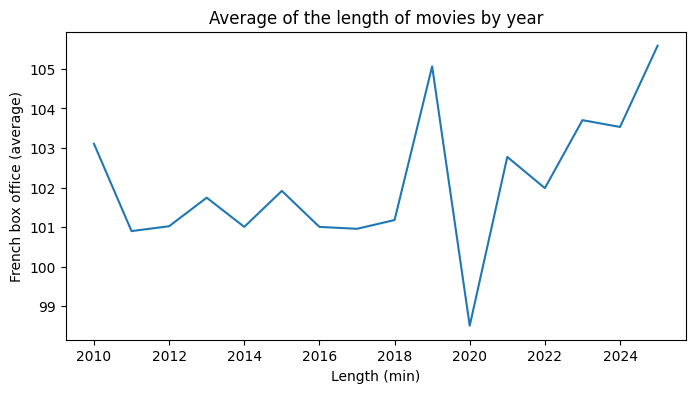

In [25]:
# Mean of length by year
mean_length_year = df['length'].groupby(df['year']).mean()
mean_length_year
# Plot of the mean by year
plt.figure(figsize=(8, 4))
sns.lineplot(x=mean_length_year.index, y=mean_length_year.values)
plt.title('Average of the length of movies by year')
plt.xlabel('Length (min)')
plt.ylabel('French box office (average)')

Text(0, 0.5, 'Number of movies')

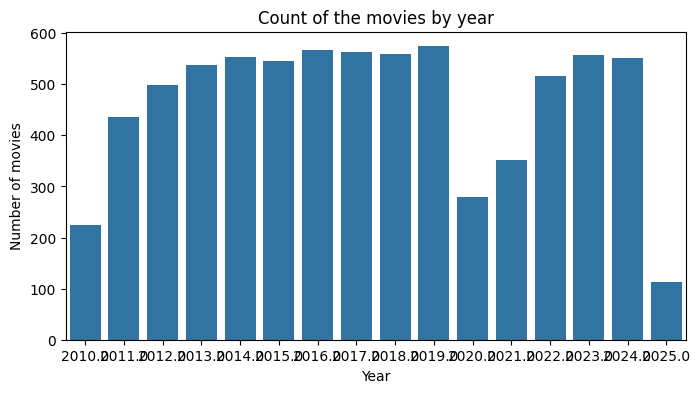

In [26]:
nb_movies_year = df['french_visa'].groupby(df['year']).count()

# Plot of the movie count by year
plt.figure(figsize=(8, 4))
sns.barplot(x=nb_movies_year.index, y=nb_movies_year.values)
plt.title('Count of the movies by year')
plt.xlabel('Year')
plt.ylabel('Number of movies')

# Study of the distribution of continuous values

In [27]:
df.columns

Index(['actors', 'critics_score', 'date', 'director', 'editor',
       'french_boxoffice', 'french_first_week_boxoffice', 'french_visa',
       'genre', 'langage', 'length', 'nationality', 'title', 'url',
       'viewers_score', 'vo_title', 'year'],
      dtype='object')

In [28]:
continuous_columns = ['critics_score', 'french_boxoffice', 'french_first_week_boxoffice', 'length', 'viewers_score']

def find_outliers_iqr(x):
    Q1 = np.percentile(x, 25)
    Q3 = np.percentile(x, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

#List to collect outliers
all_outliers = []

for i in continuous_columns:
    lower_bound, upper_bound = find_outliers_iqr(df[i])
    outliers = df[i][(df[i] < lower_bound) | (df[i] > upper_bound)]
    all_outliers.append(outliers)
    print(f"Outlier for the column {i} :")
    print(outliers)

#Combine all the outliers
all_outliers_combined = pd.concat(all_outliers)

#Count outliers
outliers_counts = all_outliers_combined.value_counts()
print("\nFrequency of outliers :")
print(outliers_counts)



Outlier for the column critics_score :
Series([], Name: critics_score, dtype: float64)
Outlier for the column french_boxoffice :
0        847743
2       2350349
9        925321
19      1677699
23      1876286
         ...   
7417     702985
7418    5608532
7421    4043310
7424    1722542
7425    3009494
Name: french_boxoffice, Length: 958, dtype: int64
Outlier for the column french_first_week_boxoffice :
Series([], Name: french_first_week_boxoffice, dtype: float64)
Outlier for the column length :
Series([], Name: length, dtype: float64)
Outlier for the column viewers_score :
Series([], Name: viewers_score, dtype: float64)

Frequency of outliers :
2617032    2
5922309    1
649548     1
3226105    1
1286430    1
          ..
1684503    1
840666     1
915608     1
1412257    1
1027340    1
Name: count, Length: 957, dtype: int64


/tmp/ipykernel_29373/2143856434.py:22: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  all_outliers_combined = pd.concat(all_outliers)


Number of outliers for critics_score: 1
Number of outliers for french_boxoffice: 164
Number of outliers for french_first_week_boxoffice: 31
Number of outliers for length: 72
Number of outliers for viewers_score: 0


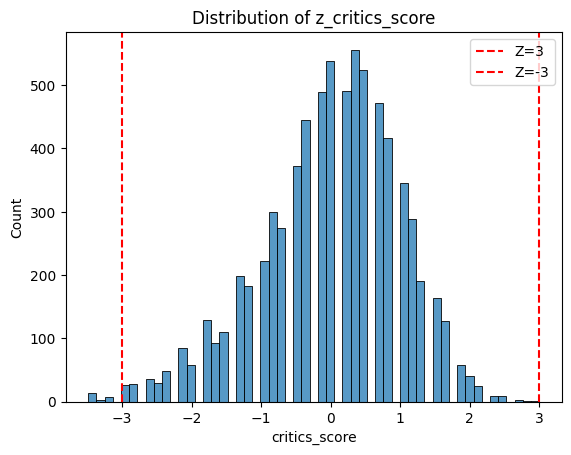

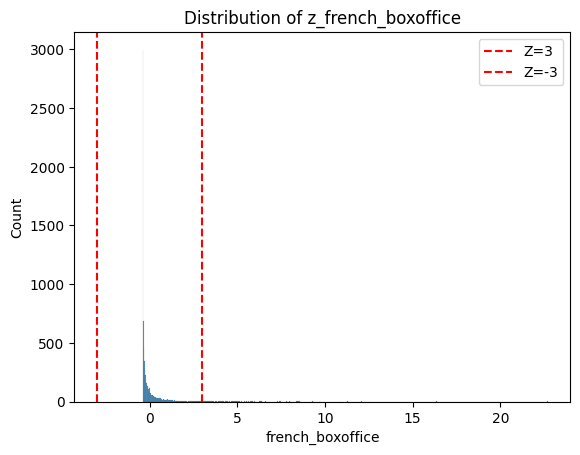

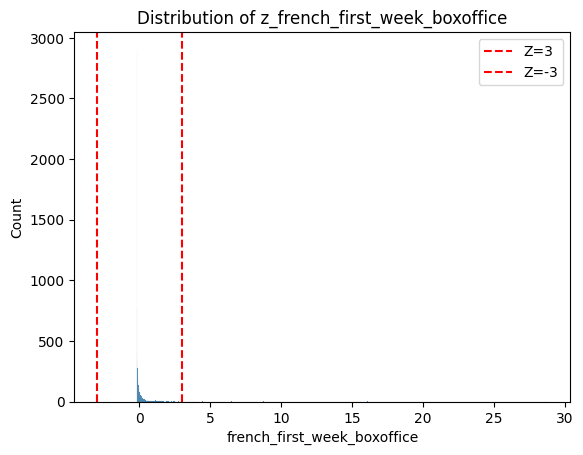

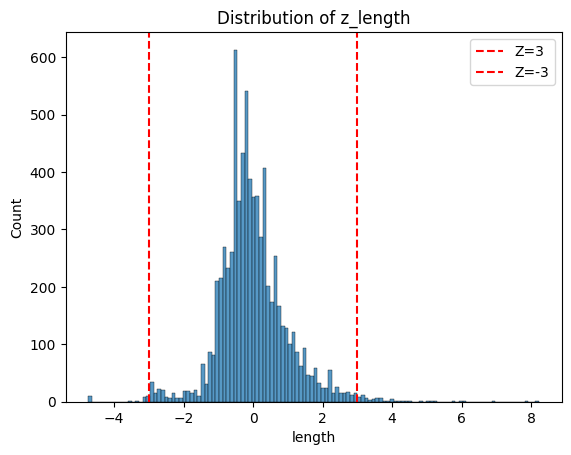

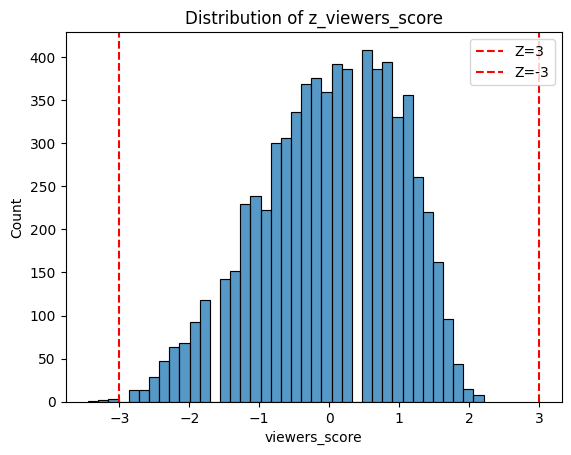

In [29]:
# Study of the zscore

zscore =stats.zscore(df[continuous_columns], nan_policy='omit') # ignore the NaN Values
zscore
df_zscore=pd.DataFrame(zscore, columns=continuous_columns)

df_zscore

#Find outliers:
outliers = {}
for col in df_zscore.columns:
    outliers[col] = df_zscore[df_zscore[col] > 3]

#count oultier for each column:
outliers_count = {col: len(outliers[col]) for col in outliers}

#Result:
for col, count in outliers_count.items():
    print(f"Number of outliers for {col}: {count}")

#Visualization:
for col in continuous_columns:
    sns.histplot(x=df_zscore[col])
    plt.axvline(3, color='red', linestyle='--', label='Z=3')
    plt.axvline(-3, color='red', linestyle='--', label='Z=-3')
    plt.legend()
    plt.title(f'Distribution of z_{col}')
    plt.show()



The distribution of the values of the continuous columns does not follow a normal law. We should perform a logarythmic transformation before to train and test our model.

# Study of categorical values

In [30]:
df.columns

Index(['actors', 'critics_score', 'date', 'director', 'editor',
       'french_boxoffice', 'french_first_week_boxoffice', 'french_visa',
       'genre', 'langage', 'length', 'nationality', 'title', 'url',
       'viewers_score', 'vo_title', 'year'],
      dtype='object')

In [31]:
# Frequency table
columns_cat = ['actors', 'director', 'editor', 'french_visa', 'genre', 'langage', 'nationality']

for i in columns_cat:
    count=df[i].value_counts()
    print("Frequency:")
    print(count)

Frequency:
actors
No actors                                               151
Ariane Ascaride|Jean-Pierre Darroussin|Gérard Meylan      4
Jennifer Lawrence|Josh Hutcherson|Liam Hemsworth          4
Guillaume Gallienne|Ben Whishaw|Hugh Bonneville           3
Chris Pratt|Zoe Saldana|Dave Bautista                     3
                                                       ... 
Pablo Cobo|Louis Peres|Marta Nieto                        1
Penélope Cruz|Vincenzo Amato|Luana Giuliani               1
Franz Rogowski|Morr N’Diaye|Laetitia Ky                   1
Rose Williams|Emma Rigby|Charlie Carrick                  1
Yuan Tian|Ning Feng Song|Weihao Xu                        1
Name: count, Length: 7227, dtype: int64
Frequency:
director
Hong Sang-Soo       21
François Ozon       12
Quentin Dupieux     12
Woody Allen         11
Ridley Scott        11
                    ..
Gary Fleder          1
Theodore Melfi       1
Michael Sucsy        1
Eric Capitaine       1
Antoine Russbach     1
Name: cou

In [32]:
# Count of actors
all_actors = df['actors'].dropna().str.split('|').sum()
actors_count = pd.Series(Counter(all_actors)).sort_values(ascending=False)

print(actors_count.head(10))

No actors            151
Isabelle Huppert      36
Kad Merad             34
Olivier Gourmet       32
Franck Dubosc         32
Benoît Poelvoorde     32
Virginie Efira        31
Isabelle Carré        29
Gilles Lellouche      29
Karin Viard           28
dtype: int64


/tmp/ipykernel_29373/3361513177.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Top_10_actors.index, y=Top_10_actors.values, palette="viridis")


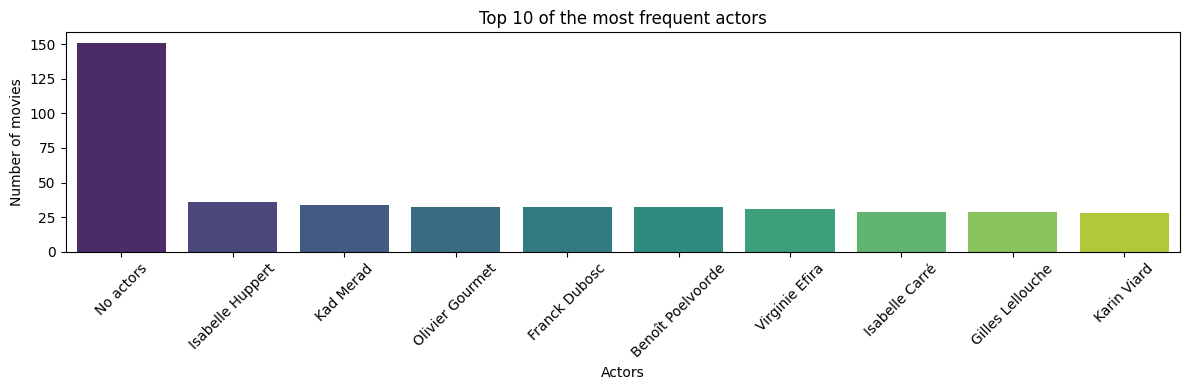

In [33]:
Top_10_actors = actors_count.head(10)
plt.figure(figsize=(12, 4))
sns.barplot(x=Top_10_actors.index, y=Top_10_actors.values, palette="viridis")
plt.title('Top 10 of the most frequent actors')
plt.xlabel('Actors')
plt.ylabel('Number of movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_29373/3148669104.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Top_10_actors.index, y=Top_10_actors.values, palette="viridis")


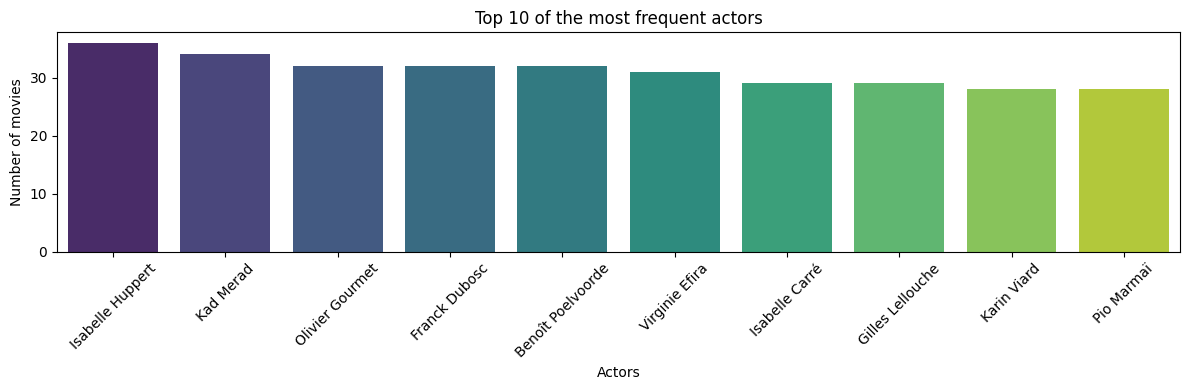

In [34]:
Top_10_actors = actors_count.drop("No actors", axis=0)
Top_10_actors = Top_10_actors.head(10)
plt.figure(figsize=(12, 4))
sns.barplot(x=Top_10_actors.index, y=Top_10_actors.values, palette="viridis")
plt.title('Top 10 of the most frequent actors')
plt.xlabel('Actors')
plt.ylabel('Number of movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [35]:
all_genres = df['genre'].dropna().str.split('|').sum()
genres_count = pd.Series(Counter(all_genres)).sort_values(ascending=False)

print(genres_count.head(10))

Drame                 3868
Comédie               1822
Thriller               973
Animation              678
Action                 672
Romance                659
Comédie dramatique     591
Aventure               558
Famille                442
Fantastique            395
dtype: int64


/tmp/ipykernel_29373/559653893.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres_count.values, y=genres_count.index, palette="viridis")


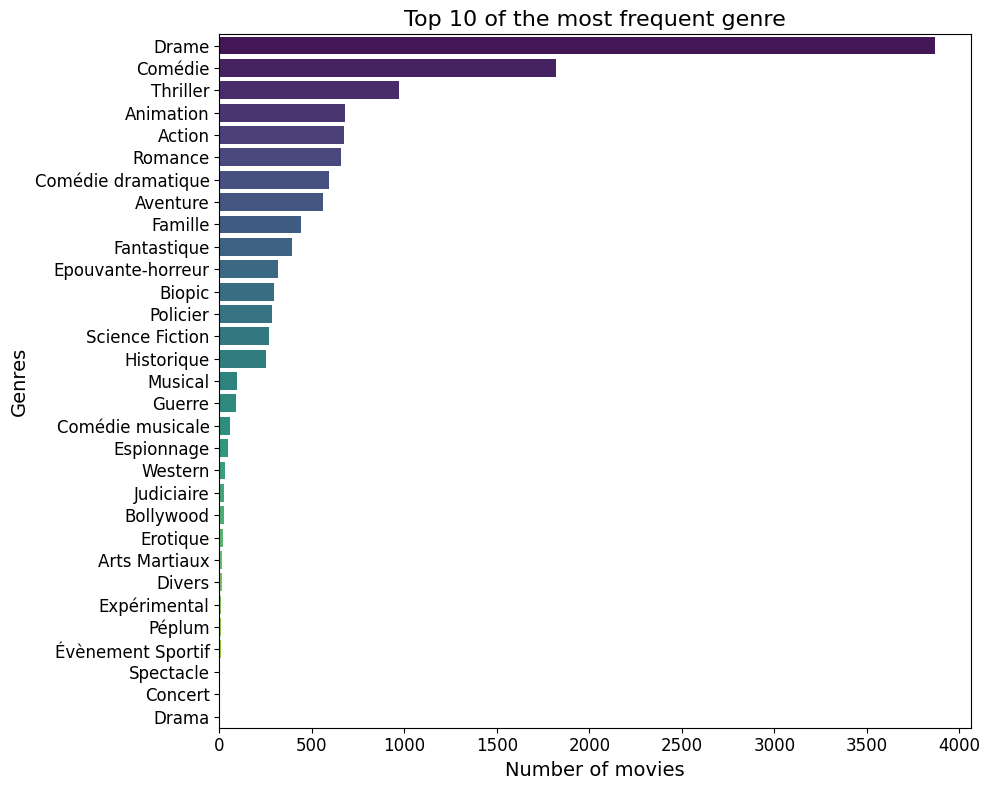

In [36]:


plt.figure(figsize=(10, 8))
sns.barplot(x=genres_count.values, y=genres_count.index, palette="viridis")
plt.title('Top 10 of the most frequent genre', fontsize=16)
plt.xlabel('Number of movies', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Genres', fontsize=14)
plt.tight_layout()
plt.show()


# Bivariate analysis: Chi² and pearson correlation test

Chi² Test if there is a significant association between two categorical values

In [37]:
# Chi²
columns_cat = ['actors', 'director', 'editor', 'french_visa', 'genre', 'langage', 'nationality']
targets = ['actors', 'director', 'editor', 'french_visa', 'genre', 'langage', 'nationality']

for target in targets:
    for col in columns_cat:
        if target == col:
            continue
        else:

            table = pd.crosstab(df[target], df[col])

            if table.shape[1] < 2 or table.shape[0] < 2:
                print(f"❌ Not possible to perform the test\n")
                continue

            chi2, p, dof, expected = chi2_contingency(table)
            
            print(f"📊 Variable : {col}")
            print(f"Chi² : {chi2:.2f}, p-value : {p:.4f}, ddl : {dof}")
        
            if p < 0.05:
                print(f"✅ {target} and {col} are dependant!\n")
            else:
                print(f"🟰 {target} and {col} are independant\n")



📊 Variable : director
Chi² : 32660387.41, p-value : 1.0000, ddl : 32729250
🟰 actors and director are independant

📊 Variable : editor
Chi² : 3347620.71, p-value : 0.0000, ddl : 3309508
✅ actors and editor are dependant!

📊 Variable : french_visa
Chi² : 48937934.89, p-value : 0.0000, ddl : 48761048
✅ actors and french_visa are dependant!

📊 Variable : genre
Chi² : 3358645.99, p-value : 0.0000, ddl : 3331186
✅ actors and genre are dependant!

📊 Variable : langage
Chi² : 3643814.50, p-value : 0.0000, ddl : 3598548
✅ actors and langage are dependant!

📊 Variable : nationality
Chi² : 9251479.11, p-value : 1.0000, ddl : 9329532
🟰 actors and nationality are independant

📊 Variable : actors
Chi² : 32660387.41, p-value : 1.0000, ddl : 32729250
🟰 director and actors are independant

📊 Variable : editor
Chi² : 2671124.61, p-value : 0.0000, ddl : 2074740
✅ director and editor are dependant!

📊 Variable : french_visa
Chi² : 30039726.09, p-value : 1.0000, ddl : 30527670
🟰 director and french_visa ar

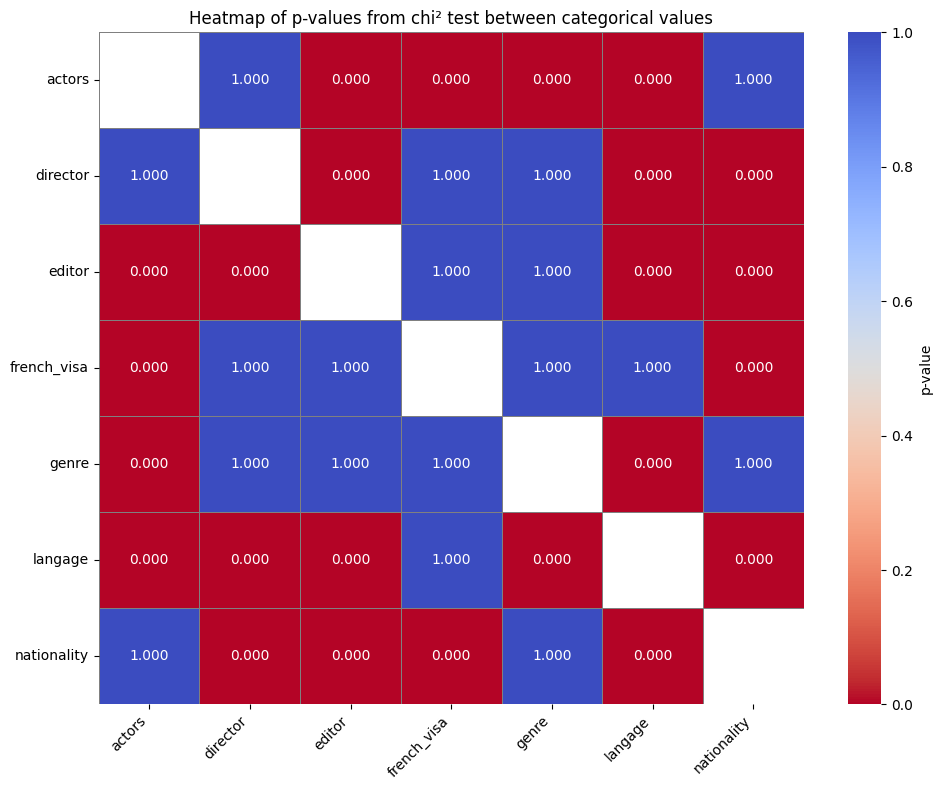

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

columns_cat = ['actors', 'director', 'editor', 'french_visa', 'genre', 'langage', 'nationality']
results = pd.DataFrame(index=columns_cat, columns=columns_cat, dtype=float)

for target in columns_cat:
    for col in columns_cat:
        if target == col:
            results.loc[target, col] = np.nan  # Pas de test sur la même variable
        else:
            table = pd.crosstab(df[target], df[col])
            if table.shape[1] < 2 or table.shape[0] < 2:
                results.loc[target, col] = np.nan  # Trop peu de données pour le test
                continue
            chi2, p, dof, expected = chi2_contingency(table)
            results.loc[target, col] = p

#  Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(results, annot=True, fmt=".3f", cmap="coolwarm_r", cbar_kws={'label': 'p-value'}, linewidths=0.5, linecolor='gray')
plt.title("Heatmap of p-values from chi² test between categorical values")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [39]:
columns_cat = ['actors', 'director', 'editor', 'french_visa', 'genre', 'langage', 'nationality']
targets = columns_cat.copy()

# Stock the result
results = []

for target in targets:
    for col in columns_cat:
        if target == col:
            continue

        table = pd.crosstab(df[target], df[col])

        if table.shape[1] < 2 or table.shape[0] < 2:
            results.append({
                'Target': target,
                'Variable': col,
                'Chi²': None,
                'p-value': None,
                'ddl': None,
                'Groups < 5': None,
                'Dependency': 'No'
            })
            continue

        chi2, p, dof, expected = chi2_contingency(table)
        effectif_warning = (expected < 5).sum()

        if p is not None:
            dependence = '✅ Dependence' if p < 0.05 else '🟰 Independence'
        else:
            dependence = '❌ Untest'

        results.append({
            'Target': target,
            'Variable': col,
            'Chi²': round(chi2, 2),
            'p-value': round(p, 4),
            'ddl': dof,
            'Groups < 5': effectif_warning,
            'Dependence': dependence
        })

df_chi2 = pd.DataFrame(results)


In [40]:
df_chi2

,Target,Variable,Chi²,p-value,ddl,Groups < 5,Dependence
0,actors,director,32660387.41,1.0,32729250,32741006,🟰 Independence
1,actors,editor,3347620.71,0.0,3309508,3317191,✅ Dependence
2,actors,french_visa,48937934.89,0.0,48761048,48775022,✅ Dependence
3,actors,genre,3358645.99,0.0,3331186,3338869,✅ Dependence
4,actors,langage,3643814.50,0.0,3598548,3606270,✅ Dependence
5,actors,nationality,9251479.11,1.0,9329532,9338044,🟰 Independence
6,director,actors,32660387.41,1.0,32729250,32741006,🟰 Independence
7,director,editor,2671124.61,0.0,2074740,2079729,✅ Dependence
8,director,french_visa,30039726.09,1.0,30527670,30538940,🟰 Independence
9,director,genre,2067744.96,1.0,2088330,2093321,🟰 Independence


In [41]:
# Cramér's V

from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np

columns_cat = ['actors', 'director', 'editor', 'french_visa', 'genre', 'langage', 'nationality']
targets = columns_cat.copy()

results = []

def cramers_v(confusion_matrix, chi2_stat):
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    if min_dim == 0:
        return np.nan
    return np.sqrt(chi2_stat / (n * min_dim))

for target in targets:
    for col in columns_cat:
        if target == col:
            continue

        table = pd.crosstab(df[target], df[col])

        if table.shape[1] < 2 or table.shape[0] < 2:
            results.append({
                'Target': target,
                'Variable': col,
                'Chi²': None,
                'p-value': None,
                'ddl': None,
                'Groups < 5': None,
                'Dependence': '❌ Unsuccessfull test',
                "Cramér's V": None
            })
            continue

        chi2, p, dof, expected = chi2_contingency(table)
        effectif_warning = (expected < 5).sum()
        cramer_v_value = cramers_v(table, chi2)

        if p is not None:
            dependence = '✅ Dependent' if p < 0.05 else '🟰 Independant'
        else:
            dependence = '❌ Test non effectué'

        results.append({
            'Target': target,
            'Variable': col,
            'Chi²': round(chi2, 2),
            'p-value': round(p, 4),
            'ddl': dof,
            'Groups < 5': effectif_warning,
            'Dependence': dependence,
            "Cramér's V": round(cramer_v_value, 3) if not np.isnan(cramer_v_value) else None
        })

# Création du DataFrame
df_chi2_cramer = pd.DataFrame(results)


In [42]:
df_chi2_cramer

,Target,Variable,Chi²,p-value,ddl,Groups < 5,Dependence,Cramér's V
0,actors,director,32660387.41,1.0,32729250,32741006,🟰 Independant,0.986
1,actors,editor,3347620.71,0.0,3309508,3317191,✅ Dependent,0.992
2,actors,french_visa,48937934.89,0.0,48761048,48775022,✅ Dependent,0.988
3,actors,genre,3358645.99,0.0,3331186,3338869,✅ Dependent,0.990
4,actors,langage,3643814.50,0.0,3598548,3606270,✅ Dependent,0.993
5,actors,nationality,9251479.11,1.0,9329532,9338044,🟰 Independant,0.982
6,director,actors,32660387.41,1.0,32729250,32741006,🟰 Independant,0.986
7,director,editor,2671124.61,0.0,2074740,2079729,✅ Dependent,0.887
8,director,french_visa,30039726.09,1.0,30527670,30538940,🟰 Independant,0.946
9,director,genre,2067744.96,1.0,2088330,2093321,🟰 Independant,0.778


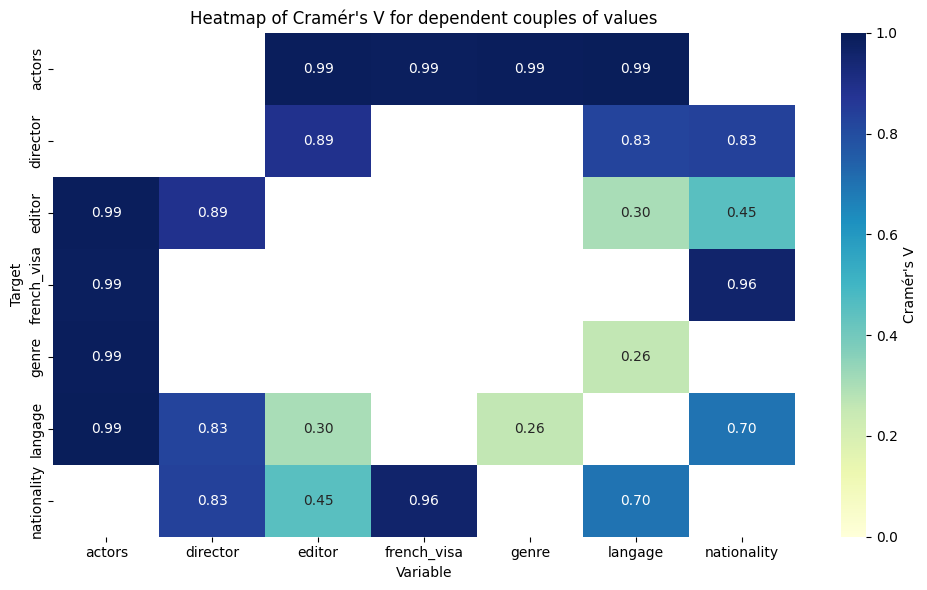

In [43]:
# Filter the significant dependence
df_significant = df_chi2_cramer[df_chi2_cramer["Dependence"] == '✅ Dependent']

# Pivot for heatmap
heatmap_cramer = df_significant.pivot(index='Target', columns='Variable', values="Cramér's V")

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_cramer, annot=True, cmap="YlGnBu", vmin=0, vmax=1, fmt=".2f", cbar_kws={'label': "Cramér's V"})
plt.title("Heatmap of Cramér's V for dependent couples of values")
plt.tight_layout()
plt.show()


Pearson test

In [44]:
n=len(continuous_columns)

#Empty matrix
a=np.empty((n,n))
a[:] = np.nan

#fulfill matrix with correlations matrix
for i in range(n):
    for j in range(n):
        x = df[continuous_columns[i]]
        y = df[continuous_columns[j]]

        # Delete Nan lines
        mask = x.notna() & y.notna()
        if mask.sum()>1:
        
            coeff, p_value = pearsonr(x[mask], y[mask])
            print(f"Correlation between {continuous_columns[i]} and {continuous_columns[j]}: coeff={coeff}, p={p_value}")
            a[i,j] = p_value
        else:
            print('not enough data to perform the test')
df_pvalue = round(pd.DataFrame(a, columns=continuous_columns, index = continuous_columns),5)

cm = sns.light_palette("blue", as_cmap=True) 

df_pvalue.style.background_gradient(cmap=cm).format(precision=2)

Correlation between critics_score and critics_score: coeff=1.0, p=0.0
Correlation between critics_score and french_boxoffice: coeff=0.048100242979444784, p=3.4604384878136065e-05
Correlation between critics_score and french_first_week_boxoffice: coeff=-0.04574280352259372, p=8.25504472921881e-05
Correlation between critics_score and length: coeff=0.1428583129973765, p=4.69525645753339e-35
Correlation between critics_score and viewers_score: coeff=0.5422886759180189, p=0.0
Correlation between french_boxoffice and critics_score: coeff=0.04810024297944479, p=3.4604384878136065e-05
Correlation between french_boxoffice and french_boxoffice: coeff=0.9999999999999996, p=0.0
Correlation between french_boxoffice and french_first_week_boxoffice: coeff=0.294199397266105, p=3.9158897241591294e-148
Correlation between french_boxoffice and length: coeff=0.1980044919314008, p=1.5892884581482234e-66
Correlation between french_boxoffice and viewers_score: coeff=0.1632154335963845, p=1.1922653195166082e

,critics_score,french_boxoffice,french_first_week_boxoffice,length,viewers_score
critics_score,0.00,0.00,0.00,0.00,0.00
french_boxoffice,0.00,0.00,0.00,0.00,0.00
french_first_week_boxoffice,0.00,0.00,0.00,0.00,0.45
length,0.00,0.00,0.00,0.00,0.00
viewers_score,0.00,0.00,0.45,0.00,0.00


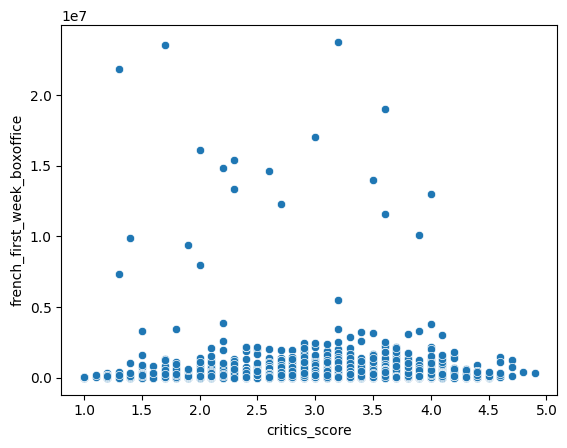

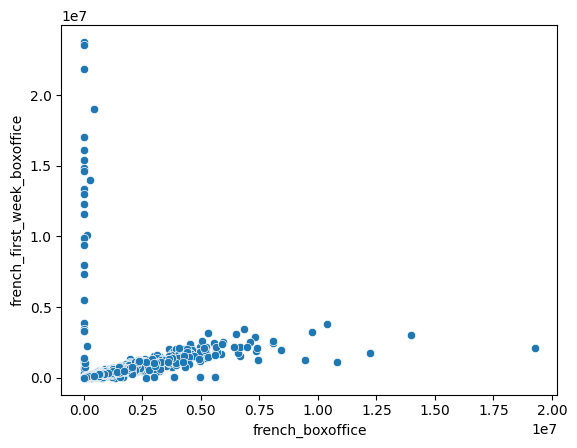

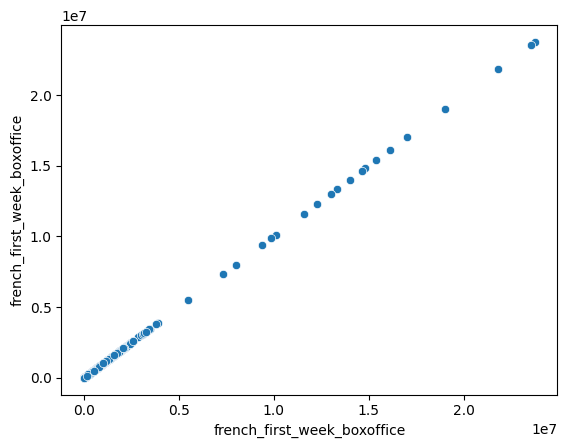

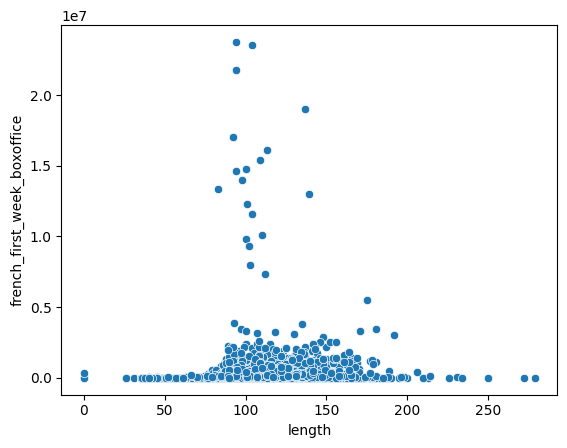

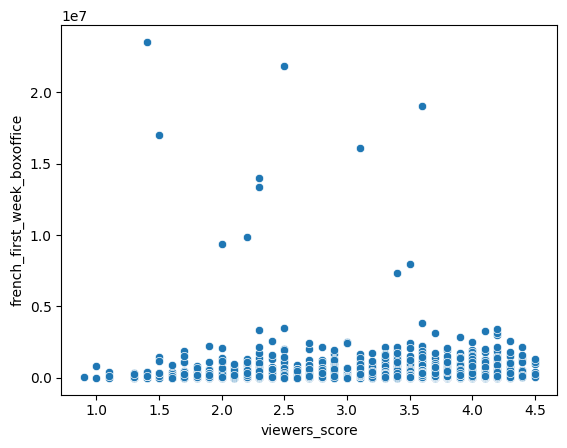

In [45]:
for i in continuous_columns:
    sns.scatterplot(x=df[i], y=df['french_first_week_boxoffice'])
    plt.show()

Anova test to test continuous data vs categorical data

In [51]:
# Stock the result
anova_results = pd.DataFrame(index=continuous_columns, columns=columns_cat)


for cont in continuous_columns:
    for cat in columns_cat:
        
        df_sub = df[[cont, cat]].dropna()
        groups = [group[cont] for _, group in df_sub.groupby(cat)]
        
        # Check for the group
        valid_groups = [g for g in groups if len(g) > 1]
        if len(valid_groups) >= 2:
            stat, p_value = f_oneway(*valid_groups)
            anova_results.loc[cont, cat] = round(p_value, 5)
        else:
            anova_results.loc[cont, cat] = np.nan
# Table
cm = sns.light_palette("blue", as_cmap=True)
anova_results = anova_results.astype(float)  
anova_results.style.background_gradient(cmap=cm).format(precision=3)

,actors,director,editor,french_visa,genre,langage,nationality
critics_score,0.000,0.000,0.000,0.673,0.000,0.000,0.000
french_boxoffice,0.000,0.000,0.000,0.721,0.000,0.000,0.000
french_first_week_boxoffice,0.000,0.000,0.000,0.853,0.000,0.000,0.218
length,0.000,0.000,0.000,0.517,0.000,0.000,0.000
viewers_score,0.000,0.000,0.000,0.737,0.000,0.000,0.000


In [49]:
# Seuil de significativité
alpha = 0.05

# Stack pour obtenir les p-values sous forme de DataFrame long
significant_pairs = anova_results.stack().reset_index()
significant_pairs.columns = ['Variable Continue', 'Variable Catégorielle', 'p-value']

# On filtre les résultats significatifs
significant_pairs = significant_pairs[significant_pairs['p-value'] < alpha].sort_values('p-value')

significant_pairs.head()  # un aperçu


,Variable Continue,Variable Catégorielle,p-value
0,critics_score,actors,0.0
1,critics_score,director,0.0
2,critics_score,editor,0.0
4,critics_score,genre,0.0
5,critics_score,langage,0.0
